# KALP HASTALIKLARINI TEŞHİS ETMEK

Bu veri seti, kalp hastalığı olan veya olmayan bir hedef koşulu ile birlikte bir dizi değişken verir.

# Kütüphanelerin yüklenmesi 

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data splitting/parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
# ML models
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix

# Veri setinin yüklenmesi

In [8]:
heart_data= pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
print(" \n ",heart_data.describe(),"\n")
heart_data.info()

 
                age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.

In [10]:
print("Heart data shape is:", heart_data.shape[0], "x", heart_data.shape[1])

Heart data shape is: 303 x 14


# Eksik veri kontrolü

In [11]:
# Missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Kolonların adları anlaşılabilir olmadığından kolon isimlerini düzenleyelim

# Veri setinin incelenmesi

In [12]:
heart_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [13]:
heart_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
heart_data.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

Daha iyi yorumlayabilmek için kategorik değişkenlerin değerlerini değiştirelim

In [15]:
heart_data['sex'][heart_data['sex'] == 0] = 'female'
heart_data['sex'][heart_data['sex'] == 1] = 'male'

heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 0] = 'typical angina'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 1] = 'atypical angina'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 2] = 'non-anginal pain'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 3] = 'asymptomatic'

heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_data['rest_ecg'][heart_data['rest_ecg'] == 0] = 'normal'
heart_data['rest_ecg'][heart_data['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_data['rest_ecg'][heart_data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart_data['exercise_induced_angina'][heart_data['exercise_induced_angina'] == 0] = 'no'
heart_data['exercise_induced_angina'][heart_data['exercise_induced_angina'] == 1] = 'yes'

heart_data['st_slope'][heart_data['st_slope'] == 0] = 'upsloping'
heart_data['st_slope'][heart_data['st_slope'] == 1] = 'flat'
heart_data['st_slope'][heart_data['st_slope'] == 2] = 'downsloping'

heart_data['thalassemia'][heart_data['thalassemia'] == 0] = 'normal'
heart_data['thalassemia'][heart_data['thalassemia'] == 1] = 'fixed defect'
heart_data['thalassemia'][heart_data['thalassemia'] == 2] = 'reversable defect'

In [16]:
heart_data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

# Verinin Görselleştirilmesi

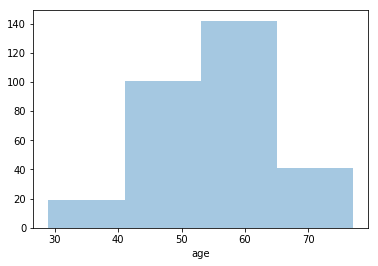

In [17]:
sns.distplot(heart_data["age"], bins=4, kde=False)

Datamızın geneli 55-65 yaş aralığındaki bireylerden oluşmakta

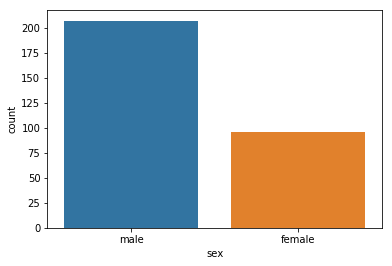

In [18]:
sns.countplot(heart_data["sex"])

Datanın 200 kadarı erkeklerden ve 100 kadarı kadınlardan oluşmakta

Text(0,0.5,'amount')

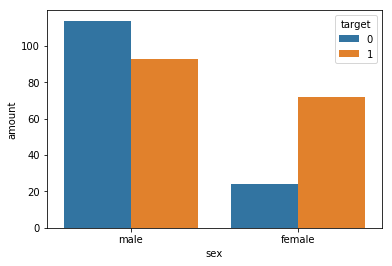

In [19]:
sex_graph = sns.countplot(heart_data["sex"], hue=heart_data["target"])
sex_graph.set_ylabel("amount")

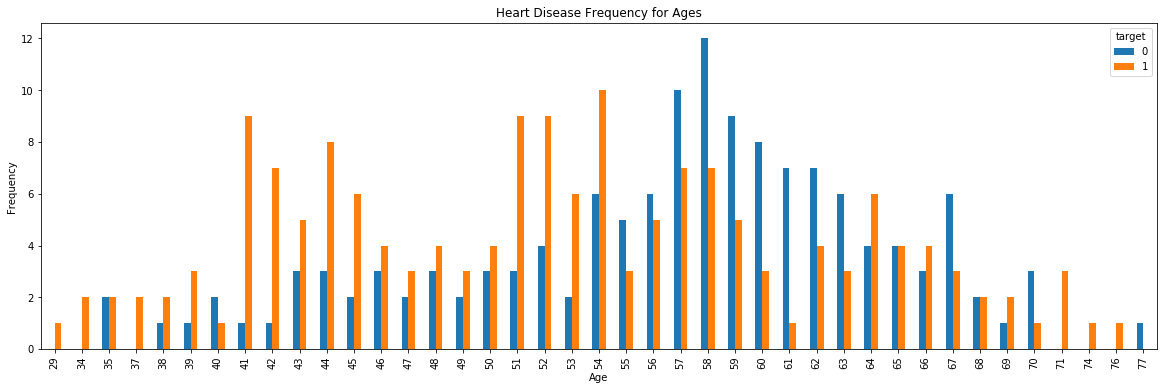

In [20]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

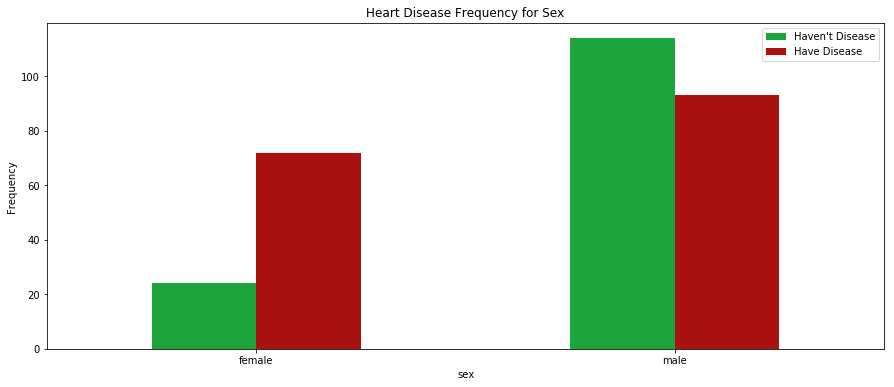

In [21]:
pd.crosstab(heart_data.sex,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

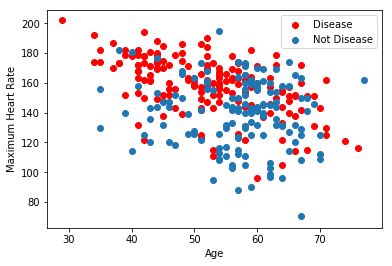

In [22]:
plt.scatter(x=heart_data.age[heart_data.target==1], y=heart_data.max_heart_rate_achieved[(heart_data.target==1)], c="red")
plt.scatter(x=heart_data.age[heart_data.target==0], y=heart_data.max_heart_rate_achieved[(heart_data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

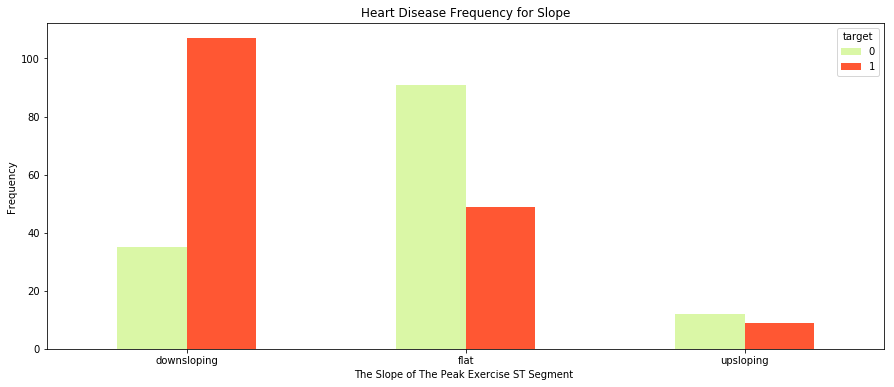

In [23]:
pd.crosstab(heart_data.st_slope,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

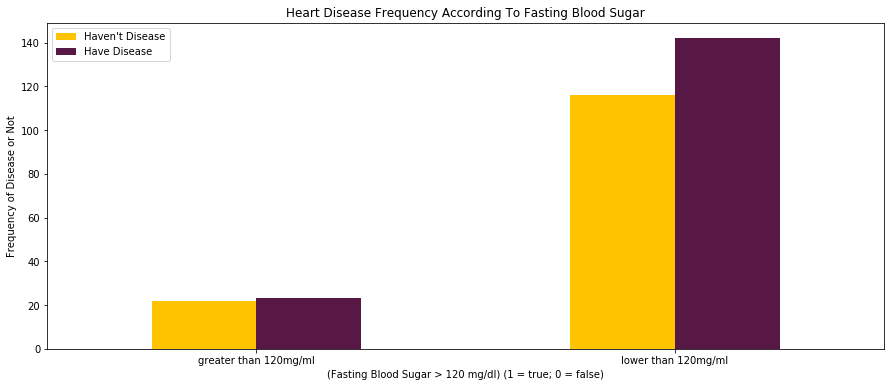

In [24]:
pd.crosstab(heart_data.fasting_blood_sugar,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To Fasting Blood Sugar')
plt.xlabel('(Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

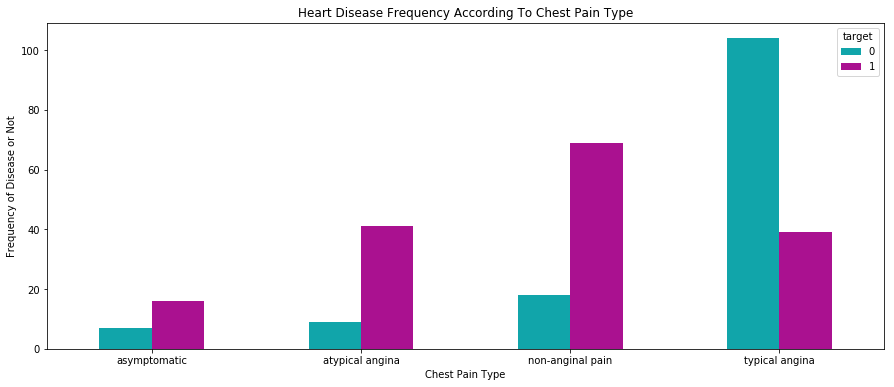

In [25]:
pd.crosstab(heart_data.chest_pain_type,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

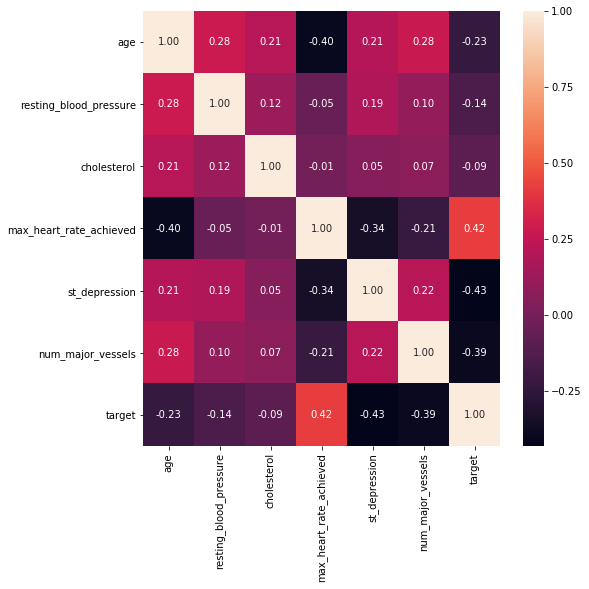

In [26]:
plt.figure(figsize=(8, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt='.2f')

Confusion matrixten'de görüldüğü gibi değişkenlerimiz pek anlamlı değil en anlamlı olanlar ise st_depression ve max_heart_rate_achieved dataları

# Veri Ön Hazırlık

In [27]:
heart_data['sex'] = heart_data['sex'].astype('object')
heart_data['chest_pain_type'] = heart_data['chest_pain_type'].astype('object')
heart_data['fasting_blood_sugar'] = heart_data['fasting_blood_sugar'].astype('object')
heart_data['rest_ecg'] = heart_data['rest_ecg'].astype('object')
heart_data['exercise_induced_angina'] = heart_data['exercise_induced_angina'].astype('object')
heart_data['st_slope'] = heart_data['st_slope'].astype('object')
heart_data['thalassemia'] = heart_data['thalassemia'].astype('object')

Kategorik değişkenler için yapay değişkenler yaratmamız gerekiyor. Bu şekilde yorumlamamızda kolaylaşıyor ve data daha anlamlı hale geliyor

In [28]:
heart_data = pd.get_dummies(heart_data, drop_first=True)

In [29]:
heart_data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1


In [30]:
print("Heart data shape is:", heart_data.shape[0], "x", heart_data.shape[1])

Heart data shape is: 303 x 20


# Feature Selection

In [31]:
X = heart_data.drop(["target"], axis=1)
y = heart_data["target"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
# Random Forest
rf_model = RandomForestClassifier()
rf_predictions = cross_val_predict(rf_model, X, y, cv=5)
print(confusion_matrix(y, rf_predictions))

[[110  28]
 [ 30 135]]


In [34]:
cro=cross_val_score(rf_model, X, y, cv=5)
print('Cross-validation score:', cross_val_score(rf_model, X_train, y_train, cv=5))
print(cro.mean())

Cross-validation score: [0.63043478 0.76086957 0.82222222 0.71111111 0.75555556]
0.7753551912568306


In [35]:
rf_model.fit(X_train, y_train)
rf_model.predict(X_test)
print(rf_model.score(X_test, y_test))

0.8947368421052632


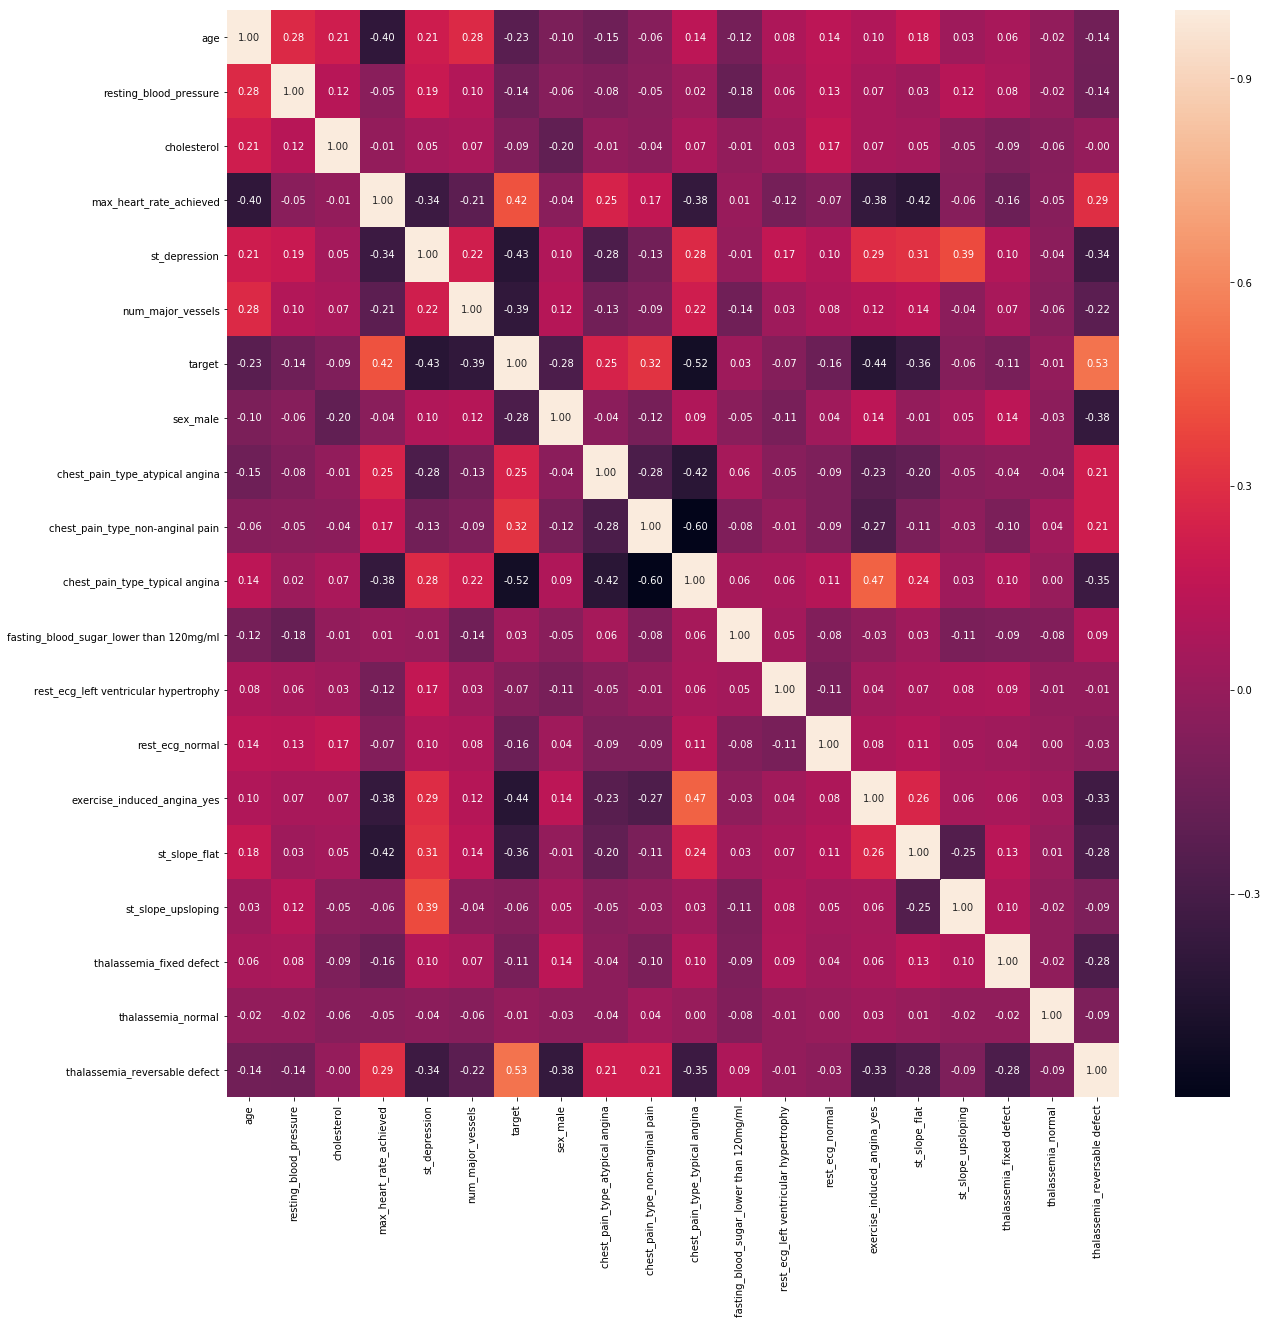

In [36]:
# Feature Selection sonrası en iyi featurelar

plt.figure(figsize=(20, 20))
sns.heatmap(heart_data.corr(), annot=True, fmt='.2f')

# Parameter Tuning

In [37]:
rf = RandomForestClassifier()

In [38]:
params = {
    'n_estimators':[10,100],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'max_leaf_nodes': [48,56],
    'min_samples_leaf' : [1, 5, 7],
    'min_samples_split': [2, 8, 10, 15],
         }
gs = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X, y)

C:\Users\Merve\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 100], 'max_depth': [10, 20, 30, 40, 50, None], 'max_features': ['auto', 'sqrt'], 'max_leaf_nodes': [48, 56], 'min_samples_leaf': [1, 5, 7], 'min_samples_split': [2, 8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
print("Grid search score with random forest classifier = ",gs.score(X_test, y_test))

Grid search score with random forest classifier =  0.8552631578947368


In [40]:
gs.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 48,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 10}

In [75]:
# Creating the Confusion matrix
pred = gs.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_pred=pred, y_true=y_test),
cm_rf

(array([[25,  8],
        [ 3, 40]], dtype=int64),)

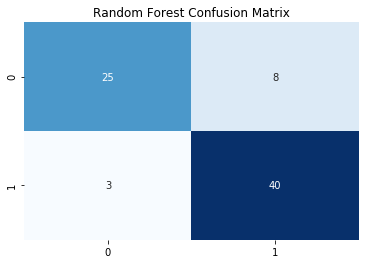

In [81]:
plt.subplot(1,1,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()